In [2]:
# Load some libraries for reading the data from the database and plotting 

import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *

from django.db.models import Count, Sum

In [38]:
classified = Doc.objects.filter(query=3769,wosarticle__wc__isnull=False)
unclassified = Doc.objects.filter(query=3769,wosarticle__wc__isnull=True)

print(f"{classified.count():,} documents with subject category - {unclassified.count():,} without")

350,964 documents with subject category - 18 without


## Are journals in many categories? 

not too much

In [39]:
journalcats = list(Doc.objects.values('wosarticle__so').annotate(
    n = Count('wosarticle__wc',distinct=True)
).order_by('-n'))
journalcats

[{'n': 4, 'wosarticle__so': 'RESEARCH POLICY'},
 {'n': 4, 'wosarticle__so': 'POLICY SCIENCES'},
 {'n': 4, 'wosarticle__so': 'FOOD POLICY'},
 {'n': 4,
  'wosarticle__so': 'INTERNATIONAL JOURNAL OF SUSTAINABILITY IN HIGHER EDUCATION'},
 {'n': 4, 'wosarticle__so': 'ANNALS OF GLACIOLOGY'},
 {'n': 4, 'wosarticle__so': 'WORLD BANK ECONOMIC REVIEW'},
 {'n': 4,
  'wosarticle__so': 'KNOWLEDGE-BASED INTELLIGENT INFORMATION AND ENGINEERING SYSTEMS, PT 1, PROCEEDINGS'},
 {'n': 4, 'wosarticle__so': 'SOIL SCIENCE AND PLANT NUTRITION'},
 {'n': 4, 'wosarticle__so': 'RAPID COMMUNICATIONS IN MASS SPECTROMETRY'},
 {'n': 3, 'wosarticle__so': 'THEORETICAL POPULATION BIOLOGY'},
 {'n': 3, 'wosarticle__so': 'ANNALS OF REGIONAL SCIENCE'},
 {'n': 3, 'wosarticle__so': 'OPTICAL AND QUANTUM ELECTRONICS'},
 {'n': 3, 'wosarticle__so': 'ACS SENSORS'},
 {'n': 3, 'wosarticle__so': 'JOURNAL OF URBAN PLANNING AND DEVELOPMENT-ASCE'},
 {'n': 3, 'wosarticle__so': 'WORLD DEVELOPMENT'},
 {'n': 3, 'wosarticle__so': 'INTERNATIO

(array([1.9011e+04, 1.6090e+03, 5.7000e+01, 9.0000e+00]),
 array([1, 2, 3, 4, 5]),
 <a list of 4 Patch objects>)

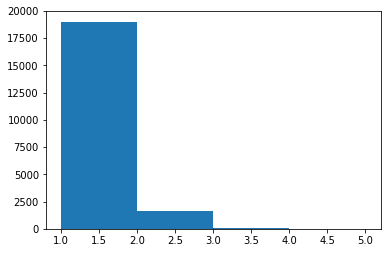

In [40]:
plt.hist([x['n'] for x in journalcats],bins=[1, 2, 3, 4,5])

In [6]:
Doc.objects.filter(wosarticle__so="ANNALS OF GLACIOLOGY").values('wosarticle__wc').annotate(
    n = Count('pk')
).order_by('-n')

<QuerySet [{'wosarticle__wc': ['Geography, Physical; Geosciences, Multidisciplinary'], 'n': 252}, {'wosarticle__wc': ['Geosciences, Multidisciplinary'], 'n': 6}, {'wosarticle__wc': ['Geochemistry & Geophysics; Geography; Geology; Geosciences,', 'Multidisciplinary'], 'n': 4}, {'wosarticle__wc': ['Geography, Physical', 'Geosciences, Multidisciplinary'], 'n': 3}]>

## Are documents in many categories

(array([3.31415e+05, 1.92970e+04, 5.10000e+01]),
 array([1, 2, 3, 4]),
 <a list of 3 Patch objects>)

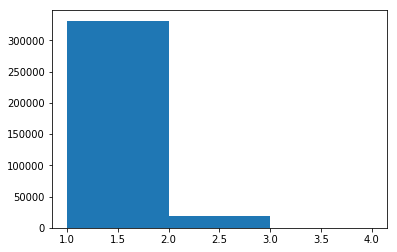

In [12]:
ds = Doc.objects.filter(query=3769).values('id').annotate(
    n = Count('wc__text',distinct=True)
)
ds.order_by('-n')

plt.hist([x['n'] for x in ds],bins=[1, 2, 3, 4])

In [26]:
interdocs = ds.filter(n__gt=1)
d = Doc.objects.get(pk=interdocs.first()['id'])
d.title
print([x.text for x in d.wc_set.all()])

['Oceanography', 'Ecology']
['Natural Sciences', 'Natural Sciences']


(array([343018.,   7745.,      0.]),
 array([1, 2, 3, 4]),
 <a list of 3 Patch objects>)

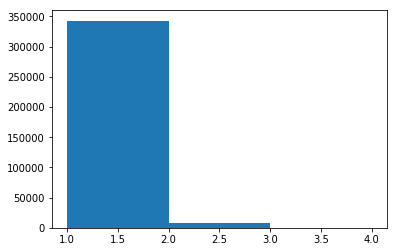

In [32]:
ds = Doc.objects.filter(query=3769).values('id').annotate(
    n = Count('wc__oecd',distinct=True)
)
ds.order_by('-n')

plt.hist([x['n'] for x in ds],bins=[1, 2, 3, 4])

In [36]:
interdocs = ds.filter(n__gt=1)
print(interdocs.count())
d = Doc.objects.get(pk=interdocs.first()['id'])
print(d.title)
print([x.text for x in d.wc_set.all()])
print([x.oecd for x in d.wc_set.all()])

7745
Regenerative sustainability for the built environment - from vision to reality: an introductory chapter
['Environmental Sciences', 'Engineering, Environmental']
['Natural Sciences', 'Engineering and Technology']


## Ambiguous mappings

In [20]:
oecd_map = pd.read_csv(
    '/home/galm/software/django/tmv/BasicBrowser/OECDWoS.csv',sep="\t",
    names=["level","fos_2","wc","fos_1"]
)
oecd_map.head()

,level,fos_2,wc,fos_1
0,1,Mathematics,"MATHEMATICS, APPLIED",Natural Sciences
1,1,Mathematics,"MATHEMATICS, INTERDISCIPLINARY APPLICATIONS",Natural Sciences
2,1,Mathematics,MATHEMATICS,Natural Sciences
3,1,Mathematics,"PHYSICS, MATHEMATICAL",Natural Sciences
4,1,Mathematics,STATISTICS & PROBABILITY,Natural Sciences


In [27]:
for name, group in oecd_map.groupby("wc"):
    if group.shape[0] > 1:
        print(group)

     level                               fos_2                         wc  \
103      2  Other engineering and technologies  FOOD SCIENCE & TECHNOLOGY   
175      4         Other agricultural sciences  FOOD SCIENCE & TECHNOLOGY   

                          fos_1  
103  Engineering and Technology  
175       Agricultural Sciences  
    level              fos_2                            wc  \
65      2  Civil engineering  NANOSCIENCE & NANOTECHNOLOGY   
99      2    Nano-technology  NANOSCIENCE & NANOTECHNOLOGY   

                         fos_1  
65  Engineering and Technology  
99  Engineering and Technology  


(1, 4)